In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


# Definindo os Hyper-parâmetros
#### (Config. de modelo)

In [2]:
learning_rate = 0.01
training_epochs = 4000
display_step = 200

# Definindo os Datasets de treino e teste
#### X - Tamanho de Casas / Y - Preço de uma Casa

In [3]:
# Dataset de treino - 70%
train_X = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]
 
# Dataset de teste - 30%
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

# Placeholders e variáveis
#### Placeholders para variáveis preditoras (x) e para variável target (y)

In [4]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Pesos e bias do modelo
w = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

# Construindo o modelo

In [5]:
# Construindo o modelo linear
# Fórmula do modelo linear: y = W*X + b
linear_model = w*x + b

# MSE - Mean Squared Error
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2 * n_samples)

# Otimização com Gradient Descent
optmizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [6]:
# Iniciando a sessão do TensorFlow
sess = tf.Session()

# Exec. o grafo computacional, treinando e testando o modelo

In [7]:
# Inicializando as variáveis
init = tf.global_variables_initializer()

Epoch:    200 	 Cost:     0.1339 	 W:  0.387 	 b: -0.1606
Epoch:    400 	 Cost:      0.112 	 W: 0.3578 	 b: 0.0463
Epoch:    600 	 Cost:    0.09849 	 W: 0.3349 	 b: 0.2086
Epoch:    800 	 Cost:    0.09019 	 W: 0.3169 	 b: 0.3359
Epoch:   1000 	 Cost:    0.08509 	 W: 0.3029 	 b: 0.4357
Epoch:   1200 	 Cost:    0.08195 	 W: 0.2918 	 b:  0.514
Epoch:   1400 	 Cost:    0.08002 	 W: 0.2831 	 b: 0.5754
Epoch:   1600 	 Cost:    0.07883 	 W: 0.2763 	 b: 0.6236
Epoch:   1800 	 Cost:     0.0781 	 W:  0.271 	 b: 0.6614
Epoch:   2000 	 Cost:    0.07765 	 W: 0.2668 	 b:  0.691
Epoch:   2200 	 Cost:    0.07737 	 W: 0.2636 	 b: 0.7143
Epoch:   2400 	 Cost:     0.0772 	 W:  0.261 	 b: 0.7325
Epoch:   2600 	 Cost:     0.0771 	 W:  0.259 	 b: 0.7468
Epoch:   2800 	 Cost:    0.07703 	 W: 0.2574 	 b:  0.758
Epoch:   3000 	 Cost:    0.07699 	 W: 0.2561 	 b: 0.7668
Epoch:   3200 	 Cost:    0.07697 	 W: 0.2552 	 b: 0.7737
Epoch:   3400 	 Cost:    0.07695 	 W: 0.2544 	 b: 0.7791
Epoch:   3600 	 Cost:    0.076

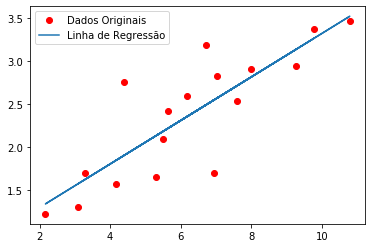

Custo Final em Teste:  0.078021765
Diferença média Quadrada Absoluta:  0.0010873526


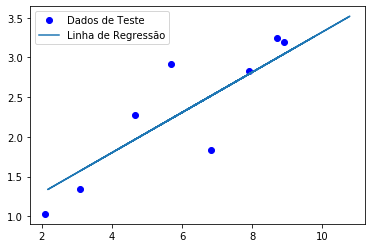

In [8]:
# Iniciandoas variáveis
sess.run(init)

# Treinando o modelo - epoch é a passada de treinamento
for epoch in range(training_epochs):
    
    # Otimizador
    sess.run(optmizer, feed_dict={x: train_X, y: train_y})
    
    # Display de cada Epoch
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={x: train_X, y: train_y})
        print('Epoch: {0:6} \t Cost: {1:10.4} \t W: {2:6.4} \t b: {3:6.4}'.format(epoch+1, c, sess.run(w), sess.run(b)))
                                                                                                                    
# Imprimindo parâmetros finais do modelo
print('\nOtimização Concluída!')
training_cost = sess.run(cost, feed_dict={x: train_X, y: train_y})
print('Custo Final de Treinamento: ',training_cost, ' - W Final: ', sess.run(w), ' - b Final: ', sess.run(b), '\n')
    
# Visualizando resultado
plt.plot(train_X, train_y, 'ro', label='Dados Originais')
plt.plot(train_X, sess.run(w) * train_X + sess.run(b), label='Linha de Regressão')
plt.legend()
plt.show()
    
# Testando modelo
testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), 
                                         feed_dict={x: test_X, y: test_y})
print('Custo Final em Teste: ', testing_cost)
print('Diferença média Quadrada Absoluta: ', abs(training_cost - testing_cost))
    
# Display em Teste
plt.plot(test_X, test_y, 'bo', label='Dados de Teste')
plt.plot(train_X, sess.run(w) * train_X + sess.run(b), label='Linha de Regressão')
plt.legend()
plt.show()
    
sess.close()